<a href="https://colab.research.google.com/github/thihanaung-thnn/data_insight/blob/main/notebooks/CI_and_Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl 
plt.style.use('fivethirtyeight')
mpl.rcParams['font.family'] = 'monospace'
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['ytick.labelleft'] = False

# Confidence Intervals

95% confidence interval means that we are 95% confident the true population mean falls within this interval. 

### Population variance known, z-score

> $\bar x \pm z_{\alpha/2} \frac{σ}{\sqrt n}$  

$\bar x$ = sample mean  
σ = population standard deviation  
n = number of samples  
$\frac{σ}{\sqrt n}$ = standard error   
$\alpha$ = 1 - confidence level  


In [ ]:
data = np.loadtxt('test.csv')
def ci_known(alpha):    
    sample_mean = np.mean(data)
    population_std = 15000
    n = len(data)
    standard_error = population_std/np.sqrt(n)
    alpha = alpha
    z = st.norm.ppf(1-alpha/2)
    ui = sample_mean + z*standard_error
    li = sample_mean - z*standard_error
    return li, ui

ci_known(0.05)

(94832.7842355152, 105567.94909781814)

In [ ]:
ci_known(0.01)

(93146.1675974839, 107254.56573584944)

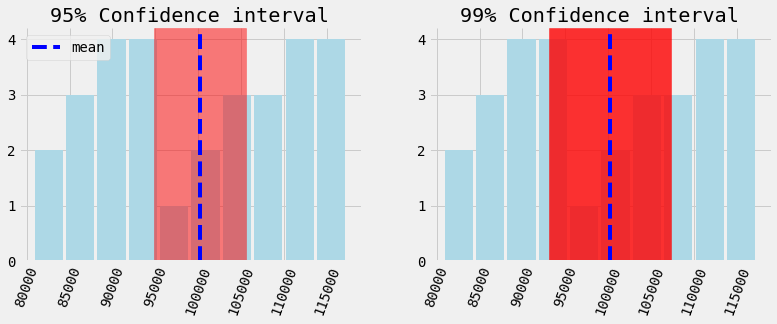

In [ ]:
sample_mean = np.mean(data)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(data, rwidth=0.9, color='lightblue')
plt.axvspan(ci_known(0.05)[0], ci_known(0.05)[1], alpha=0.5, color='red')
plt.axvline(sample_mean, color='blue', linestyle='--', label='sample mean')
plt.legend()
plt.title('95% Confidence interval')
plt.xticks(rotation=70)

plt.subplot(122)
plt.hist(data, rwidth=0.9, color='lightblue')
plt.axvspan(ci_known(0.01)[0], ci_known(0.01)[1], alpha=0.8, color='red')
plt.axvline(sample_mean, color='blue', linestyle='--', label='mean')
plt.title('99% Confidence interval')
plt.xticks(rotation=70);

### Population variance unknown, t-score

> $\bar x \pm t_{n-1, \alpha/2} \frac{s}{\sqrt n}$  

$\bar x$ = sample mean  
$t_{n-1, \alpha / 2}$ = t-statistics  
s = sample standard deviation  
n = sample size  

In [ ]:
# data = np.array([78000,90000,75000,117000,105000,96000,89500,102300,80000])
data = np.array([102.86, 130.41, 133.44, 100.08, 139.62, 146.78, 162.24, 133.51,
       105.78,  70.95, 108.16, 114.92, 153.79,  90.63])


def ci_unknown(alpha):
    
    sample_mean = np.mean(data)
    n = len(data) 
    dof = n - 1
    s = np.std(data, ddof=1)
    se = s/np.sqrt(n)
    alpha = alpha
    t = st.t.ppf((1-alpha/2), dof)
    ui = sample_mean + t*se
    li = sample_mean - t*se
    return li.round(2), ui.round(2)

ci_unknown(0.05)

(105.91, 135.98)

In [ ]:
ci_unknown(0.01)

(99.98, 141.9)

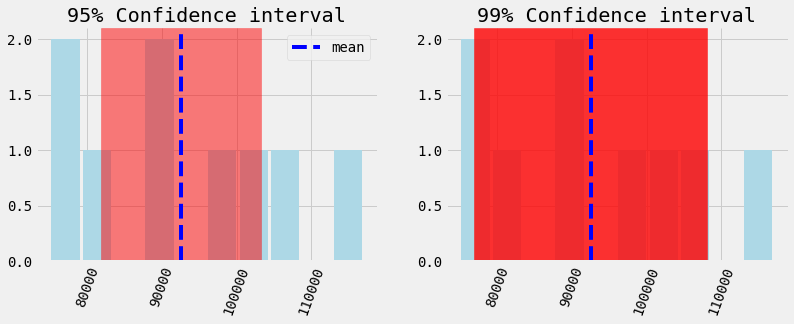

In [ ]:
sample_mean = np.mean(data)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(data, rwidth=0.9, color='lightblue')
plt.axvspan(ci_unknown(0.05)[0], ci_unknown(0.05)[1], alpha=0.5, color='red')
plt.axvline(sample_mean, color='blue', linestyle='--', label='sample mean')
plt.legend()
plt.title('95% Confidence interval')
plt.xticks(rotation=70)

plt.subplot(122)
plt.hist(data, rwidth=0.9, color='lightblue')
plt.axvspan(ci_unknown(0.01)[0], ci_unknown(0.01)[1], alpha=0.8, color='red')
plt.axvline(sample_mean, color='blue', linestyle='--', label='mean')
plt.title('99% Confidence interval')
plt.xticks(rotation=70);

### Two Means, Dependent Samples

- When researching the same subject over time such as weight loss or blood samples from the same person (before and after).
- researching families  

> $\bar d \pm t_{n-1,\alpha/2} \frac{s_d}{\sqrt n}$  

$\bar d$ = mean of difference values in sample  
$s_d$ = standard deviation of difference values  



eg- blood magnesium level before and after treatment

In [ ]:
before = np.array([2.,1.4,1.3,1.1,1.8,1.6,1.5,0.7,0.9,1.5])
after = np.array([1.7,1.7,1.8,1.3,1.7,1.5,1.6,1.7,1.7,2.4])
difference = after - before
diff_mean = np.mean(difference)
diff_std = np.std(difference, ddof=1)
n = len(difference)
dof = n - 1 
se = diff_std / np.sqrt(n)
alpha = 0.05
t = st.t.ppf((1-alpha/2), dof)
ui = diff_mean - t*se
li = diff_mean + t*se
print(f'Lower Interval : {ui:.3f}')
print(f'Upper Interval : {li:.3f}')

Lower Interval : 0.005
Upper Interval : 0.655


1. In 95% of the cases, the true mean will fall in this interval. 
2. the whole interval is positive.
3. the levels of Mg in the test subjects' blood is higher.

### Two Means, Independent Samples, Known Population variances

**Considerations**  
1. The populations are normally distributed.
2. The population variances are known. 
3. The sample sizes are different.  
4. Samples are big.  
Then, `Z-statistics`   

**Variance of the difference**  
> $σ_{diff}^2 = \frac{σ_{x}^2}{n_{x}} +  \frac{σ_{y}^2}{n_{y}}$   

**Confidence Interval**  
> $(\bar x - \bar y) \pm z_{\alpha/2} \sqrt{\frac{σ_{x}^2}{n_{x}} +  \frac{σ_{y}^2}{n_{y}}}$  

eg- Two groups, engineering and management, and their respective sample size, means of english score, and standard devations and compare these two groups.

**Hypothesis Testing**  

> $Z = \frac{\bar x - \mu_0}{\sqrt{\frac{σ_{x}^2}{n_{x}} +  \frac{σ_{y}^2}{n_{y}}}}$

In [ ]:
size1, size2= 100, 70
mean1, mean2 = 58, 65
std1, std2 = 10, 6

diff_std = np.sqrt((std1**2/size1)+(std2**2/size2))
alpha = 0.05
z = st.norm.ppf(1-alpha/2)
ui = (mean1 - mean2) + z*diff_std 
li = (mean1 - mean2) - z*diff_std  
print(f"Lower Interval : {li:.3f}")
print(f"Upper Interval : {ui:.3f}")

Lower Interval : -9.412
Upper Interval : -4.588


Null Hypothesis : difference between two groups is -4. 

In [ ]:
diff_mean = mean1 - mean2 
hypothesize_mean = -4
Z = (diff_mean - hypothesize_mean)/diff_std
st.norm.cdf(Z)*2

0.014772526348193598

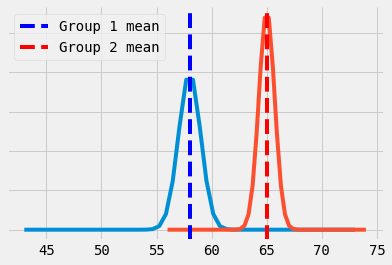

In [ ]:
x1 = np.linspace(mean1-15, mean1+15)
x2 = np.linspace(mean2-9, mean2+9)

plt.plot(x1, st.norm.pdf(x1, mean1, std1/np.sqrt(size1)))
plt.plot(x2, st.norm.pdf(x2, mean2, std2/np.sqrt(size2)))
plt.axvline(mean1, label='Group 1 mean',linestyle='--',color='blue')
plt.axvline(mean2, label='Group 2 mean',linestyle='--',color='red')
# plt.text(45,0.2,f'Mean diff = {mean1-mean2}')
plt.legend();

### Two Means, Independent Intervals, Variance unknown, assumed to be equal

eg - Prices of apple from different stores. 

**Pooled Variance**  
> $s_p^2 = \frac{(n_x - 1)s_x^2 + (n_y - 1)s_y^2}{n_x + n_y - 2}$

> $(\bar x - \bar y) \pm t_{n_x+n_y-2,\alpha/2} \sqrt{\frac{s_p^2}{n_x} + \frac{s_p^2}{n_y}}$

In [ ]:
price_town1 = np.array([3.8 , 3.76, 3.87, 3.99, 4.02, 4.25, 4.13, 3.98, 3.99, 3.62])
price_town2 = np.array([3.02, 3.22, 3.24, 3.02, 3.06, 3.15, 3.81, 3.44])


n1, n2 = len(price_town1), len(price_town2)
mean1, mean2 = np.mean(price_town1), np.mean(price_town2)
var1, var2 = np.var(price_town1, ddof=1), np.var(price_town2, ddof=1)
dof = n1 + n2 - 2

s_p = ((n1-1)*var1 + (n2-1)*var2)/dof
alpha = 0.1
se = np.sqrt((s_p/n1)+(s_p/n2))
t = st.t.ppf((1-alpha/2), dof)

ui = (mean1 - mean2) + t*se
li = (mean1 - mean2) - t*se

print(f"Lower Interval : {li:.3f}")
print(f"Upper Interval : {ui:.3f}")

Lower Interval : 0.510
Upper Interval : 0.882


### Two Means, Independent Intervals, Variance unknown, assumed to be different

eg - apple and orange prices 

> $(\bar x - \bar y) \pm t_{v,\alpha/2} \sqrt{\frac{s_p^2}{n_x} + \frac{s_p^2}{n_y}}$  

> $v = \frac{(\frac{s_x^2}{n_x} + \frac{s_y^2}{n_y})^2}{\frac {(\frac{s_x^2}{n_x})^2}{(n_x - 1)} + \frac {(\frac{s_y^2}{n_y})^2}{(n_y - 1)}}$

# Hypothesis Testing

- $\alpha$ (significance level) - the probability of rejecting the null hypothesis if it is true   

**How does hypothesis testing work?**
1. Calculate a statistics (eg. $\bar x$)  
2. scale it 
**Z test**  
> $Z = \frac{\bar x - μ}{\frac{s}{\sqrt n}}$  

$\bar x$ = sample mean  
μ = hypothesize mean  
$s/\sqrt n$ = standard error  

3. check if $Z$ is in the rejection region. 

<table>
    <tr>
    <td></td>
    <td>H0 is true</td>
    <td>H0 is false</td>
    </tr>
    <tr>
    <td>Accept</td>
    <td>OK</td>
    <td>Type II error (False Negative)</td>
    </tr>
    <tr>
    <td>Reject</td>
    <td>Type I error (False Positive)</td>
    <td>OK</td>
    </tr>
</table>  


**Type I error** - probability of rejecting a true null hypothesis (α)  
**Type II error** - probability of failure to reject a false null hypothesis (1-β) a.k.a power of a test  
**p_value** - smallest level of significance at which we can still reject the null hypothesis, given the ovserved sample statistics


### Population Variance Known

**Z test**  
> $Z = \frac{\bar x - μ}{\frac{s}{\sqrt n}}$  

$\bar x$ = sample mean  
μ = hypothesize mean  
$s/\sqrt n$ = standard error 

Eg. here is the sample data for salaries and someone said that mean value of populatin salary is `$`113000, population standard error is `$`15000 and it is the null hypothesis. Alternative hypothesis is mean salary is not `$`113000. 

In [ ]:
salaries = np.array([117313, 104002, 113038, 101936,  84560, 113136,  80740, 100536,
       105052,  87201,  91986,  94868,  90745, 102848,  85927, 112276,
       108637,  96818,  92307, 114564, 109714, 108833, 115295,  89279,
        81720,  89344, 114426,  90410,  95118, 113382])


sample_mean = np.mean(salaries)
hypothesize_mean = 113000
s = 15000
n = len(salaries) 
se = s/np.sqrt(n)
z = (sample_mean - hypothesize_mean)/se
z

-4.673765269641137

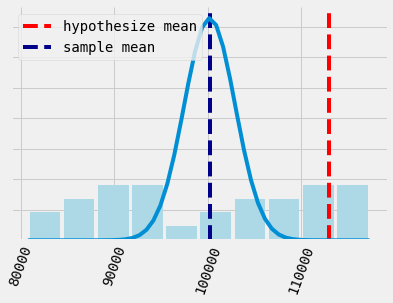

In [ ]:
plt.hist(salaries, rwidth=0.9, color='lightblue',density=True)
plt.axvline(hypothesize_mean, linestyle='--',label='hypothesize mean',color='red')
plt.axvline(sample_mean, linestyle='--',label='sample mean',color='darkblue')
plt.legend()
plt.xticks(rotation=70)

x_axis = np.linspace(min(salaries), max(salaries))
y = st.norm.pdf(x_axis, sample_mean,se)
plt.plot(x_axis, y);

### Two means, Dependent Samples

> $T = \frac{\bar d - \mu_0}{St.error}$

In [ ]:
before = np.array([2.,1.4,1.3,1.1,1.8,1.6,1.5,0.7,0.9,1.5])
after = np.array([1.7,1.7,1.8,1.3,1.7,1.5,1.6,1.7,1.7,2.4])
difference = after - before
diff_mean = np.mean(difference)
diff_std = np.std(difference, ddof=1)
n = len(difference)
dof = n - 1 
se = diff_std / np.sqrt(n)

T = diff_mean / se
1 - st.t.cdf(T, dof)

0.02369696819869893

In [ ]:
st.ttest_rel(before, after)[1]/2

0.02369696819869895

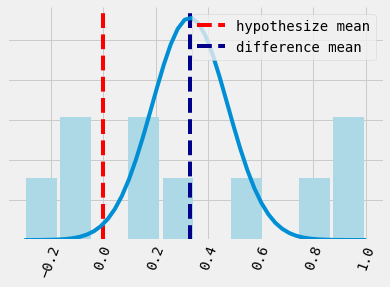

In [ ]:
plt.hist(difference, rwidth=0.9, color='lightblue',density=True)
plt.axvline(0, linestyle='--',label='hypothesize mean',color='red')
plt.axvline(diff_mean, linestyle='--',label='difference mean',color='darkblue')
plt.legend()
plt.xticks(rotation=70)

x_axis = np.linspace(min(difference), max(difference))
y = st.norm.pdf(x_axis, diff_mean,se)
plt.plot(x_axis, y);